## Smoothing

#### https://www.displayr.com/smoothing-time-series-data/

The aim of smoothing is to remove “irregular” noise and cyclical components of the time series. It aims to provide a more accurate prediction of the long term trend. If long term trend is what you want to forecast, then smoothing techniques are generally quite helpful.

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.


In [1]:
# import statements

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, BatchNormalization

from sklearn.model_selection import train_test_split
from random import shuffle

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE


/Users/nickeylawrence/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read the Gear2 data
Gear2Files = ['./Gear2/segment2.csv', './Gear2/segment3.csv','./Gear2/segment4.csv',
              './Gear2/segment5.csv','./Gear2/segment6.csv']

X_Gear2=[0] * len(Gear2Files)
Y_Gear2=[0] * len(Gear2Files)
for index,file in enumerate(Gear2Files):
    X_Gear2[index] = pd.read_csv(file);
    Y_Gear2[index] = pd.DataFrame(data= np.full((X_Gear2[index].shape[0],1), 2));
    X_Gear2[index] = X_Gear2[index].assign(Gear=Y_Gear2[index].values);

# Read the Gear3 data
Gear3Files = ['./Gear3/segment1.csv', './Gear3/segment2.csv','./Gear3/segment3.csv',
              './Gear3/segment4.csv','./Gear3/segment5.csv', './Gear3/segment6.csv']

X_Gear3=[0] * len(Gear3Files)
Y_Gear3=[0] * len(Gear3Files)
for index,file in enumerate(Gear3Files):
    X_Gear3[index] = pd.read_csv(file);
    Y_Gear3[index] = pd.DataFrame(data= np.full((X_Gear3[index].shape[0],1), 3));
    X_Gear3[index] = X_Gear3[index].assign(Gear=Y_Gear3[index].values);

# Read the Gear4 data
Gear4Files = ['./Gear4/segment2.csv','./Gear4/segment3.csv','./Gear4/segment4.csv',
              './Gear4/segment5.csv', './Gear4/segment6a.csv','./Gear4/segment6b.csv']

X_Gear4=[0] * len(Gear4Files)
Y_Gear4=[0] * len(Gear4Files)
for index,file in enumerate(Gear4Files):
    X_Gear4[index] = pd.read_csv(file);
    Y_Gear4[index] = pd.DataFrame(data= np.full((X_Gear4[index].shape[0],1), 4));
    X_Gear4[index] = X_Gear4[index].assign(Gear=Y_Gear4[index].values);

# Read the Gear 5 data
Gear5Files = ['./Double/segment1.csv','./Double/segment2.csv','./Double/segment3.csv',
              './Double/segment4.csv', './Double/segment5.csv','./Double/segment7.csv']

X_Gear5=[0] * len(Gear5Files)
Y_Gear5=[0] * len(Gear5Files)
for index,file in enumerate(Gear5Files):
    X_Gear5[index] = pd.read_csv(file);
    Y_Gear5[index] = pd.DataFrame(data= np.full((X_Gear5[index].shape[0],1), 5));
    X_Gear5[index] = X_Gear5[index].assign(Gear=Y_Gear5[index].values);

In [3]:
# Implement moving average for a window size of 3, and split the segments such that each has 750 time-steps

limit = 750
features = list(X_Gear2[0].columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

XGear=[]
for index in range(len(X_Gear2)):
    dataG2 = X_Gear2[index];
    x = dataG2[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear2[index][scaledFeatures] = rolling_mean;
    dataG2 = X_Gear2[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG2)/limit);
    XGear += [dataG2[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear3)):
    dataG3 = X_Gear3[index];
    x = dataG3[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear3[index][scaledFeatures] = rolling_mean;
    dataG3 = X_Gear3[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG3)/limit);
    XGear += [dataG3[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear4)):
    dataG4 = X_Gear4[index];
    x = dataG4[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear4[index][scaledFeatures] = rolling_mean;
    dataG4 = X_Gear4[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG4)/limit);
    XGear += [dataG4[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
for index in range(len(X_Gear5)):
    dataG5 = X_Gear5[index];
    x = dataG5[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear5[index][scaledFeatures] = rolling_mean;
    dataG5 = X_Gear5[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG5)/limit);
    XGear += [dataG5[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    

In [4]:
# Sample data after rolling

# features = list(X_Gear2[0].columns);
# scaledFeatures = [item for item in features if item not in ['t','Gear']]

# X2_Gear2_New = pd.DataFrame(X_Gear2[0][scaledFeatures])

# rolling = X2_Gear2_New.rolling(window=3)
# rolling_mean = rolling.mean()

# X2_Gear2_New['fL'].plot()
# rolling_mean['fL'].plot(color='yellow')
# plt.show()

In [5]:
X = XGear[:] # Copy words
shuffle(X) 

In [6]:
X = pd.concat(X);

In [7]:
data = pd.DataFrame(X);

data.reset_index(inplace = True, drop = True)
for i in range(len(data)):
    data.loc[i,'t'] = i*0.02

In [8]:
# Normalisation
# Feature normalization
# Normalize Time Series Data
# Source : https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# useful when your time series data has input values with differing scales.
features = list(data.columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

for i in range(len(scaledFeatures)):
    feature = scaledFeatures[i];
    print('Scaling feature : ', scaledFeatures[i])
    values = X[feature].values.reshape(-1,1);
    values = values.astype('float32');
    scaler = MinMaxScaler(feature_range = (0,1));
    scaled_f = scaler.fit_transform(values);
    X[feature] = scaled_f;

Scaling feature :  fL
Scaling feature :  thL
Scaling feature :  w1L
Scaling feature :  w2L
Scaling feature :  w3L
Scaling feature :  a1L
Scaling feature :  a2L
Scaling feature :  a3L
Scaling feature :  fR
Scaling feature :  thR
Scaling feature :  w1R
Scaling feature :  w2R
Scaling feature :  w3R
Scaling feature :  a1R
Scaling feature :  a2R
Scaling feature :  a3R
Scaling feature :  x
Scaling feature :  y
Scaling feature :  v
Scaling feature :  vdir


In [9]:
# Create one-hot Y vectors
features.remove('Gear')
X = data[features]
Y = data['Gear']
# Create one-hot Y vectors
Y_onehot = pd.get_dummies(Y).values;

In [10]:
X = np.array(X)
Y = np.array(Y_onehot)

In [11]:
timesteps = 1
XNew = X.reshape(X.shape[0],timesteps,21)
YNew = Y.reshape(Y.shape[0],timesteps,4)

trainX, testX, trainY, testY = train_test_split(XNew, YNew, test_size=0.2);

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2);

In [12]:
# design and fit our LSTM network

model = Sequential();
model.add(LSTM(64, return_sequences = True, input_shape = (timesteps, 20)));
model.add(Dense(4, activation = 'softmax'));
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(trainX[:,:,1:], trainY, epochs=200, batch_size=100, validation_data=(valX[:,:,1:],valY))


Train on 16460 samples, validate on 4116 samples
Epoch 1/200
16460/16460 [==============================] - 13s 811us/step - loss: 1.1935 - categorical_accuracy: 0.4869 - val_loss: 0.8885 - val_categorical_accuracy: 0.6562
Epoch 2/200
16460/16460 [==============================] - 8s 489us/step - loss: 0.7442 - categorical_accuracy: 0.6935 - val_loss: 0.6904 - val_categorical_accuracy: 0.7031
Epoch 3/200
16460/16460 [==============================] - 9s 539us/step - loss: 0.6485 - categorical_accuracy: 0.7124 - val_loss: 0.6326 - val_categorical_accuracy: 0.7211
Epoch 4/200
16460/16460 [==============================] - 8s 508us/step - loss: 0.6134 - categorical_accuracy: 0.7219 - val_loss: 0.6082 - val_categorical_accuracy: 0.7240
Epoch 5/200
16460/16460 [==============================] - 9s 548us/step - loss: 0.5900 - categorical_accuracy: 0.7331 - val_loss: 0.5909 - val_categorical_accuracy: 0.7320
Epoch 6/200
16460/16460 [==============================] - 9s 543us/step - loss: 0.57

Epoch 48/200
16460/16460 [==============================] - 8s 499us/step - loss: 0.3154 - categorical_accuracy: 0.8775 - val_loss: 0.3171 - val_categorical_accuracy: 0.8771
Epoch 49/200
16460/16460 [==============================] - 8s 504us/step - loss: 0.3112 - categorical_accuracy: 0.8790 - val_loss: 0.3131 - val_categorical_accuracy: 0.8778
Epoch 50/200
16460/16460 [==============================] - 8s 459us/step - loss: 0.3073 - categorical_accuracy: 0.8810 - val_loss: 0.3088 - val_categorical_accuracy: 0.8776
Epoch 51/200
16460/16460 [==============================] - 10s 634us/step - loss: 0.3032 - categorical_accuracy: 0.8808 - val_loss: 0.3071 - val_categorical_accuracy: 0.8851
Epoch 52/200
16460/16460 [==============================] - 9s 530us/step - loss: 0.2999 - categorical_accuracy: 0.8812 - val_loss: 0.3026 - val_categorical_accuracy: 0.8802
Epoch 53/200
16460/16460 [==============================] - 9s 518us/step - loss: 0.2965 - categorical_accuracy: 0.8814 - val_los

Epoch 95/200
16460/16460 [==============================] - 6s 345us/step - loss: 0.1968 - categorical_accuracy: 0.9213 - val_loss: 0.1959 - val_categorical_accuracy: 0.9247
Epoch 96/200
16460/16460 [==============================] - 5s 287us/step - loss: 0.1936 - categorical_accuracy: 0.9217 - val_loss: 0.1988 - val_categorical_accuracy: 0.9220
Epoch 97/200
16460/16460 [==============================] - 4s 266us/step - loss: 0.1932 - categorical_accuracy: 0.9234 - val_loss: 0.1959 - val_categorical_accuracy: 0.9244
Epoch 98/200
16460/16460 [==============================] - 5s 285us/step - loss: 0.1903 - categorical_accuracy: 0.9250 - val_loss: 0.1921 - val_categorical_accuracy: 0.9269
Epoch 99/200
16460/16460 [==============================] - 5s 322us/step - loss: 0.1909 - categorical_accuracy: 0.9231 - val_loss: 0.1895 - val_categorical_accuracy: 0.9298
Epoch 100/200
16460/16460 [==============================] - 5s 295us/step - loss: 0.1879 - categorical_accuracy: 0.9266 - val_los

16460/16460 [==============================] - 10s 604us/step - loss: 0.1432 - categorical_accuracy: 0.9423 - val_loss: 0.1491 - val_categorical_accuracy: 0.9410
Epoch 142/200
16460/16460 [==============================] - 8s 486us/step - loss: 0.1428 - categorical_accuracy: 0.9425 - val_loss: 0.1476 - val_categorical_accuracy: 0.9422
Epoch 143/200
16460/16460 [==============================] - 9s 556us/step - loss: 0.1424 - categorical_accuracy: 0.9439 - val_loss: 0.1485 - val_categorical_accuracy: 0.9441
Epoch 144/200
16460/16460 [==============================] - 11s 642us/step - loss: 0.1400 - categorical_accuracy: 0.9441 - val_loss: 0.1454 - val_categorical_accuracy: 0.9441
Epoch 145/200
16460/16460 [==============================] - 9s 527us/step - loss: 0.1404 - categorical_accuracy: 0.9429 - val_loss: 0.1423 - val_categorical_accuracy: 0.9412
Epoch 146/200
16460/16460 [==============================] - 9s 529us/step - loss: 0.1400 - categorical_accuracy: 0.9437 - val_loss: 0.14

16460/16460 [==============================] - 9s 517us/step - loss: 0.1123 - categorical_accuracy: 0.9564 - val_loss: 0.1202 - val_categorical_accuracy: 0.9558
Epoch 188/200
16460/16460 [==============================] - 10s 578us/step - loss: 0.1112 - categorical_accuracy: 0.9566 - val_loss: 0.1133 - val_categorical_accuracy: 0.9548
Epoch 189/200
16460/16460 [==============================] - 11s 666us/step - loss: 0.1112 - categorical_accuracy: 0.9562 - val_loss: 0.1129 - val_categorical_accuracy: 0.9555
Epoch 190/200
16460/16460 [==============================] - 10s 620us/step - loss: 0.1095 - categorical_accuracy: 0.9566 - val_loss: 0.1138 - val_categorical_accuracy: 0.9575
Epoch 191/200
16460/16460 [==============================] - 9s 523us/step - loss: 0.1092 - categorical_accuracy: 0.9563 - val_loss: 0.1098 - val_categorical_accuracy: 0.9597
Epoch 192/200
16460/16460 [==============================] - 8s 501us/step - loss: 0.1086 - categorical_accuracy: 0.9572 - val_loss: 0.1

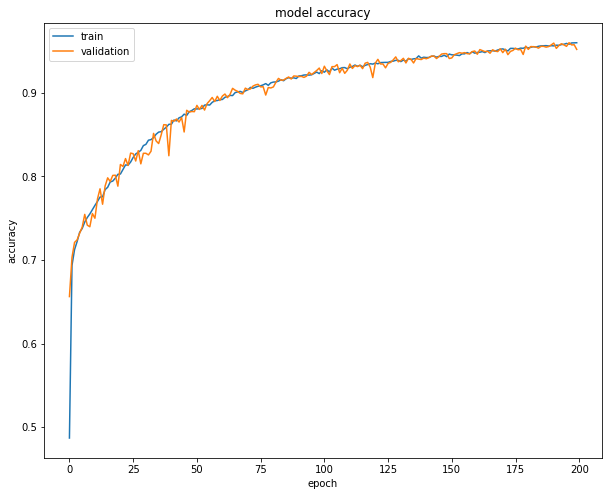

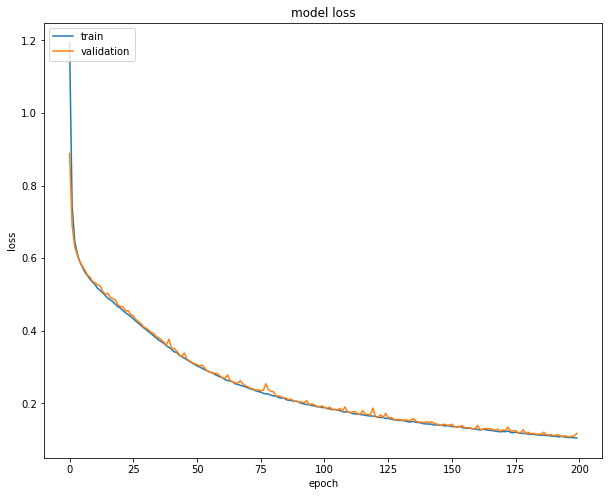

In [14]:
# summarize history for accuracy
plt.figure(0,figsize=(10, 8))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(0,figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
# Evaluate
predictions = model.predict_classes(testX[:,:,1:])

In [16]:
scores = model.evaluate(testX[:,:,1:], testY, verbose=2)
print(scores)

[0.11726948432334659, 0.954315707527831]


In [17]:
timeTest = np.array(testX[:,:,0])
forceLeftTest = np.array(testX[:,:,1])
forceRightTest = np.array(testX[:,:,9])
predTest = np.array(predictions+2)
realTest = np.array(np.argmax(testY, axis=2)+2)
result = np.concatenate((timeTest,forceLeftTest, forceRightTest, predTest, realTest), axis=1)

In [18]:
ind=np.argsort(result[:,0])
result2 = result[ind]

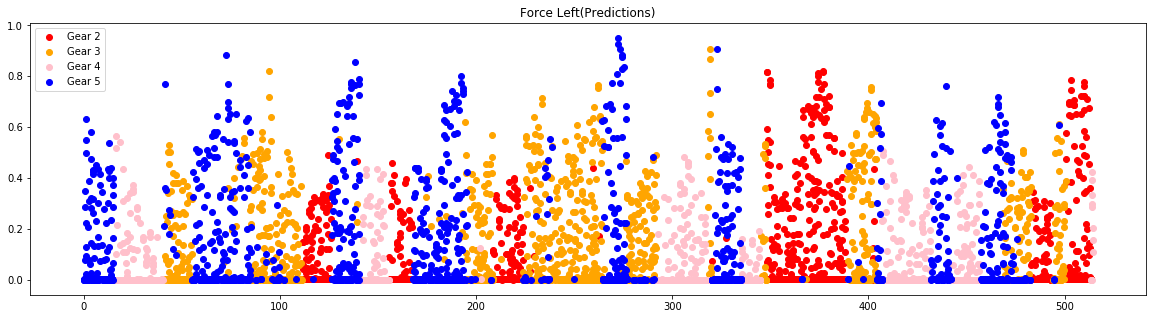

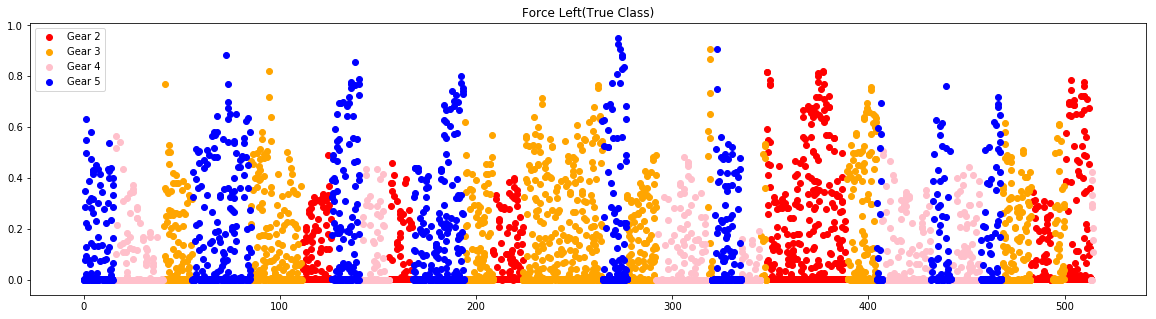

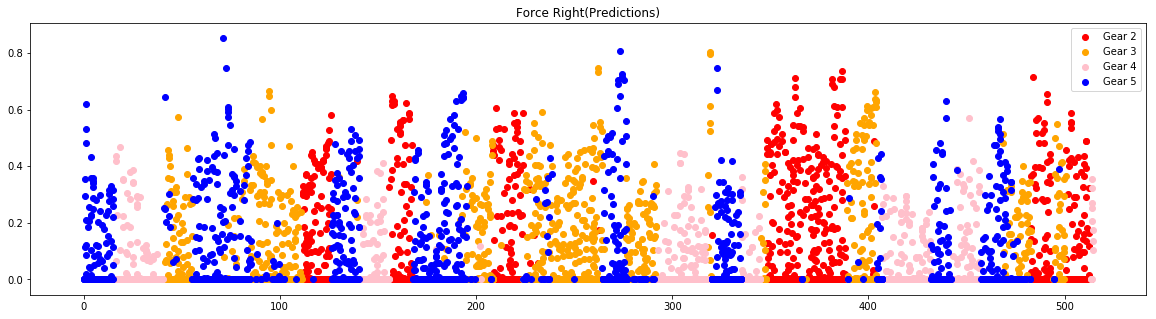

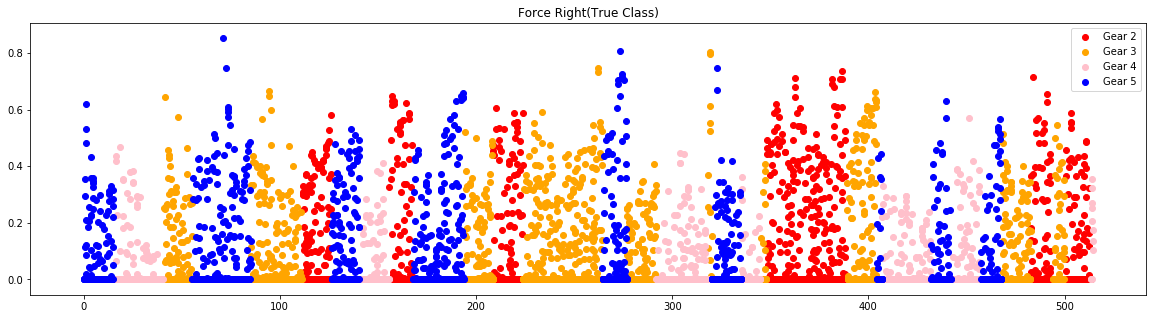

In [19]:
plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Left(Predictions)')
for i in range(2,6):
    classResult = result[result[:,3]==i]
    plt.scatter(classResult[:,0],classResult[:,1],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Left(True Class)')
for i in range(2,6):
    classRealResult = result[result[:,4]==i]
    plt.scatter(classRealResult[:,0],classRealResult[:,1],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
plt.title('Force Right(Predictions)')
for i in range(2,6):
    classResult = result[result[:,3]==i]
    plt.scatter(classResult[:,0],classResult[:,2],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Right(True Class)')
for i in range(2,6):
    classRealResult = result[result[:,4]==i]
    plt.scatter(classRealResult[:,0],classRealResult[:,2],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()


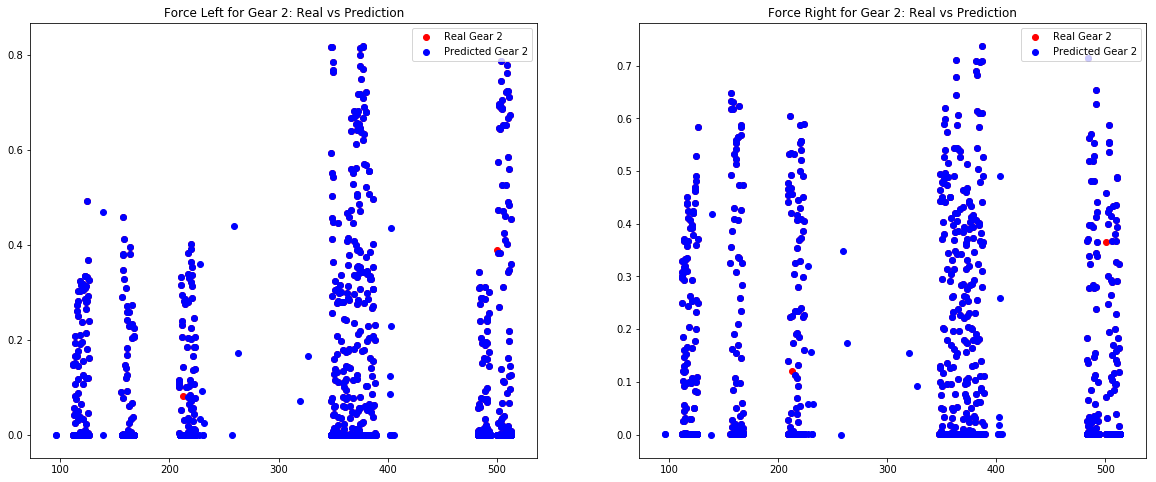

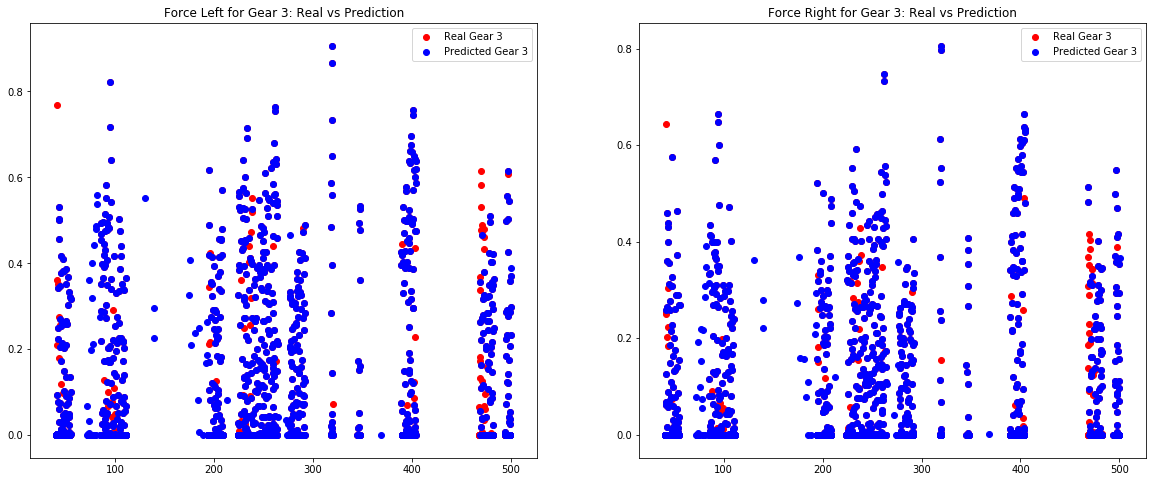

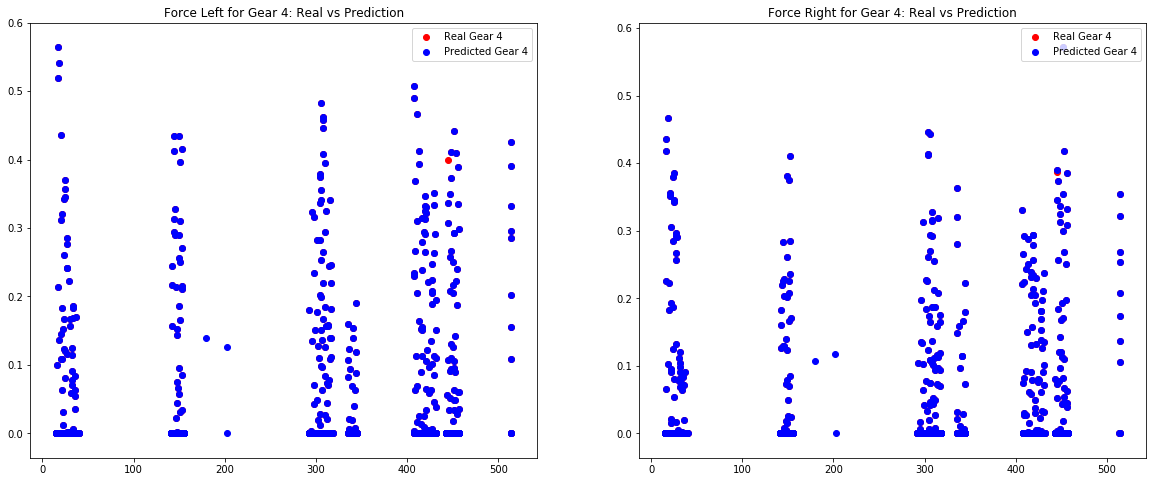

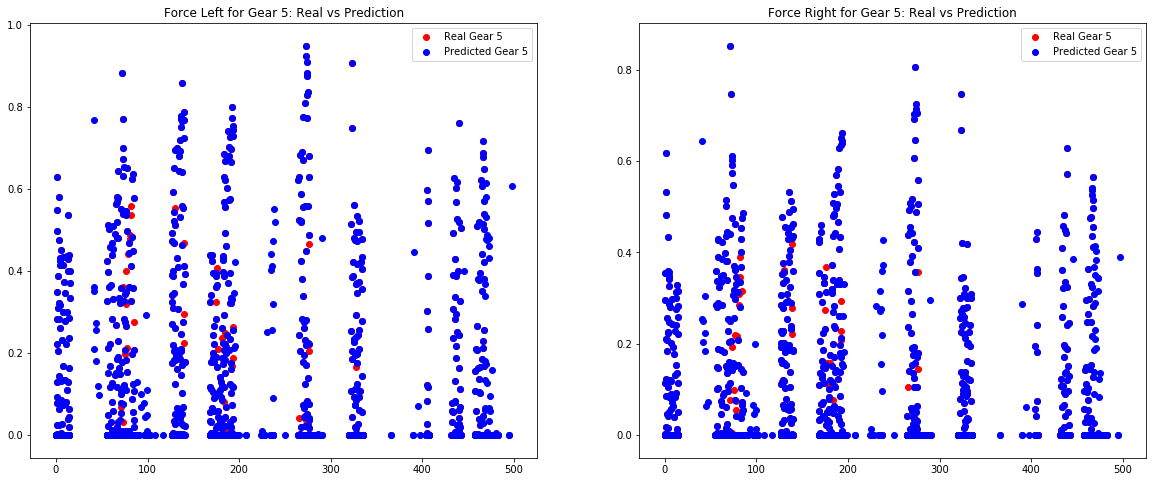

In [21]:
for i in range(2,6):
    classPredResult = result[result[:,3]==i]
    classRealResult = result[result[:,4]==i]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
    
    ax1.set_title('Force Left for Gear '+str(i) +': Real vs Prediction') 
    ax1.scatter(classRealResult[:,0],classRealResult[:,1],c ='red',label='Real Gear ' + str(i))
    ax1.scatter(classPredResult[:,0],classPredResult[:,1],c ='blue',label='Predicted Gear ' + str(i))
    ax1.legend(loc="upper right")
    
    ax2.set_title('Force Right for Gear '+str(i) +': Real vs Prediction') 
    ax2.scatter(classRealResult[:,0],classRealResult[:,2],c ='red',label='Real Gear ' + str(i))
    ax2.scatter(classPredResult[:,0],classPredResult[:,2],c ='blue',label='Predicted Gear ' + str(i))
    ax2.legend(loc="upper right")
plt.show()    

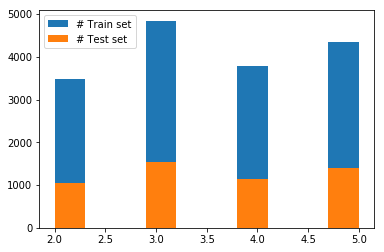

In [22]:
# Count of data for each gear in training set
i = (np.argmax(trainY, axis = 2)) + 2

# Count of data for each gear in test set
j = (np.argmax(testY, axis = 2)) + 2

plt.hist(i, label = '# Train set')
plt.hist(j, label = '# Test set')
plt.legend()
plt.show()